In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets//Breast_cancer_wisconsin_diagnostic_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
diagnosis=df['diagnosis'].map(lambda row: 1 if row=='M' else 0)

In [5]:
df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, inplace=True)

In [6]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.isnull().sum().sum()

0

In [8]:
df['diagnosis']=diagnosis

In [9]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [10]:
df.shape

(569, 31)

# Build kNN from scratch in Python

In [11]:
train_set=df.iloc[:456, :]

In [12]:
test_set=df.iloc[456:, :]

In [13]:
train_data=train_set.values.tolist()

In [14]:
train_data[:1]

[[17.99,
  10.38,
  122.8,
  1001.0,
  0.1184,
  0.2776,
  0.3001,
  0.1471,
  0.2419,
  0.07871,
  1.095,
  0.9053,
  8.589,
  153.4,
  0.006399,
  0.04904,
  0.05373,
  0.01587,
  0.03003,
  0.006193,
  25.38,
  17.33,
  184.6,
  2019.0,
  0.1622,
  0.6656,
  0.7119,
  0.2654,
  0.4601,
  0.1189,
  1.0]]

In [15]:
test_data=test_set.values.tolist()

In [16]:
X_train=[row[:-1] for row in train_data]
Y_train=[row[-1] for row in train_data]

In [17]:
X_test=[row[:-1] for row in test_data]
Y_test=[row[-1] for row in test_data]

In [18]:
def euclidean_distance(train_row, test_row):
    distance=0
    
    for t in range(len(train_row)-1):
        distance+=(train_row[t]-test_row[t])**2
    
    return math.sqrt(distance)

In [19]:
print(euclidean_distance([180, 80, 1], [180, 70]))

10.0


In [20]:
def get_distances(train_data, test_row):
    distances=[]
    
    for train_row in train_data:
        distance=euclidean_distance(train_row, test_row)
        distances.append( (train_row, distance) )
    
        """
    for row in range(len(distances)):
        for i in range (len(distances)-1):
            if distances[i][-1]>distances[i+1][-1]:
                
                distances[i], distances[i+1]=distances[i+1], distances[i]
                
    
    print(distances)
    """
    distances.sort(key=lambda x: x[1]) 
    
    return distances

In [21]:
print(get_distances([ [180, 80, 1], [170, 70, 1], [150, 65, 0], [160, 55, 0] ], [180, 70]))

[([180, 80, 1], 10.0), ([170, 70, 1], 10.0), ([160, 55, 0], 25.0), ([150, 65, 0], 30.4138126514911)]


In [22]:
def get_neighbors(train_data, test_row, num_of_neighbors):
    distances=get_distances(train_data, test_row)
    neighbors=[]
    for i in range(num_of_neighbors):
        neighbors.append(distances[i][0])
        
    return neighbors

In [23]:
print(get_neighbors([ [180, 80, 1], [170, 70, 1], [150, 65, 0], [160, 55, 0] ], [180, 70], 2))

[[180, 80, 1], [170, 70, 1]]


In [24]:
def prediction(train_data, test_row, num_of_neighbors):
    neighbors=get_neighbors(train_data, test_row, num_of_neighbors)
    
    y_values=[ row[-1] for row in neighbors]
    
    prediction=max(y_values, key=y_values.count)
    
    return prediction

In [25]:
Y_preds=[]
for test_row in test_data:
    res=prediction(train_data, test_row, 3)
    Y_preds.append(res)

In [26]:
print(accuracy_score(Y_test, Y_preds))

0.9292035398230089


In [27]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# KNN with sklearn

In [28]:
X=df.drop('diagnosis', axis=1)
Y=df['diagnosis']

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=1, test_size=0.3)

In [30]:
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.9298245614035088


In [31]:
res={'neighbors':[], 'train_scores':[], 'test_scores':[]}
for each in range(1, 15):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(X_train, Y_train)
    
    Y_train_pred=knn.predict(X_train)
    Y_test_pred=knn.predict(X_test)
    
    train_score=accuracy_score(Y_train, Y_train_pred)
    test_score=accuracy_score(Y_test, Y_test_pred)
    
    res['neighbors'].append(each)
    res['train_scores'].append(train_score)
    res['test_scores'].append(test_score)

In [32]:
res=pd.DataFrame(res)

In [33]:
res

,neighbors,train_scores,test_scores
0,1,1.000000,0.923977
1,2,0.949749,0.894737
2,3,0.947236,0.923977
3,4,0.942211,0.929825
4,5,0.937186,0.929825
5,6,0.934673,0.923977
6,7,0.932161,0.935673
7,8,0.932161,0.929825
8,9,0.932161,0.929825
9,10,0.932161,0.929825


<AxesSubplot:xlabel='neighbors', ylabel='train_scores'>

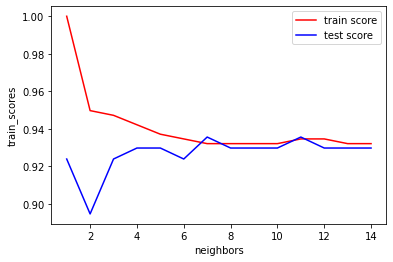

In [34]:
sns.lineplot(res['neighbors'], res['train_scores'], label='train score', color='red')
sns.lineplot(res['neighbors'], res['test_scores'], label='test score', color='blue')

# Model tuning

In [35]:
knn_params={'n_neighbors':np.arange(1, 50)}

knn=KNeighborsClassifier()

knn_cv=GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, Y_train)

print(knn_cv.best_params_)

{'n_neighbors': 14}


In [36]:
knn_tuned=KNeighborsClassifier(3)
knn_tuned.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
train_score=knn_tuned.score(X_train, Y_train)
test_score=knn_tuned.score(X_test, Y_test)

In [38]:
print(train_score)
print(test_score)

0.9472361809045227
0.9239766081871345


# Conclusion

##### We should choose K in K - Nearest Neighbour Algorithms wisely.
##### If we choose our K = 1 , then our algorithm behaves as over fitting and it gives a non - smooth decision surface.
##### As K increases, our decision surface gets smoother.
##### And, if we choose K = n, then our algorithm behaves as underfitting and it gives a smooth decision surface
##### and everything becomes one class which is the majority class in our dataset.
##### So, we should choose K wisely such that it should neither be overfitting nor be underfitting.